In [24]:
!pip install tensorflow streamlit matplotlib numpy pandas

In [25]:
!pip list

Package                      Version
---------------------------- -----------
absl-py                      2.1.0
altair                       5.3.0
asttokens                    2.4.1
astunparse                   1.6.3
attrs                        23.2.0
blinker                      1.8.0
cachetools                   5.3.3
certifi                      2024.2.2
charset-normalizer           3.3.2
click                        8.1.7
colorama                     0.4.6
comm                         0.2.2
contourpy                    1.2.1
cycler                       0.12.1
debugpy                      1.8.1
decorator                    5.1.1
exceptiongroup               1.2.1
executing                    2.0.1
flatbuffers                  24.3.25
fonttools                    4.51.0
gast                         0.5.4
gitdb                        4.0.11
GitPython                    3.1.43
google-pasta                 0.2.0
grpcio                       1.62.2
h5py                         3.11.0


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [27]:
data_train_path = "Fruits_Vegetables/train"
data_test_path = "Fruits_Vegetables/test"
data_val_path = "Fruits_Vegetables/validation"

In [28]:
img_width = 180
img_height = 180

In [29]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False
)

Found 3115 files belonging to 36 classes.


In [30]:
data_cat = data_train.class_names

In [31]:
data_cat

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [32]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 351 files belonging to 36 classes.


In [33]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    shuffle=True,
    image_size=(img_width,img_height),
    batch_size=32,
    validation_split=False,
)

Found 359 files belonging to 36 classes.


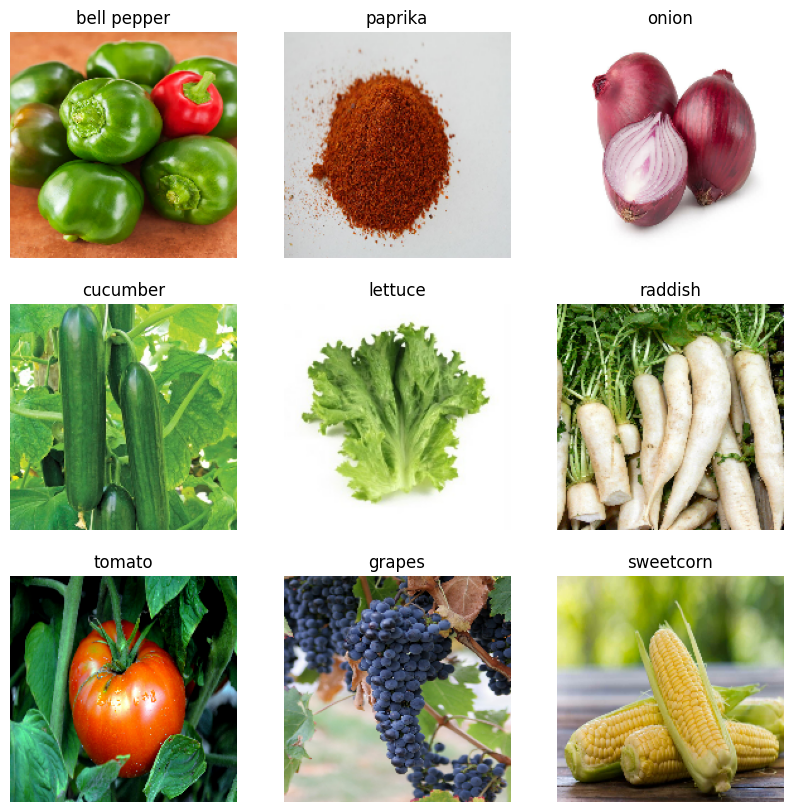

In [34]:
plt.figure(figsize=(10,10))
for image, labels in data_train.take(1):
    for i in range(9):
        plt.subplot(3,3,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(data_cat[labels[i]])
        plt.axis("off")

In [40]:
from tensorflow.keras.models import Sequential

In [41]:
data_train

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [42]:
model = Sequential([
    layers.Rescaling(1./255),
    layers.Conv2D(16, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding="same", activation="relu"),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128),
    layers.Dense(len(data_cat))
])

In [43]:
model.compile(optimizer="adam", loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=["accuracy"])

In [44]:
epochs_size = 25
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 16s 152ms/step - accuracy: 0.0580 - loss: 3.6616 - val_accuracy: 0.3647 - val_loss: 2.4292
Epoch 2/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 17s 175ms/step - accuracy: 0.2752 - loss: 2.5761 - val_accuracy: 0.5584 - val_loss: 1.6205
Epoch 3/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 197ms/step - accuracy: 0.4756 - loss: 1.8966 - val_accuracy: 0.7635 - val_loss: 1.0177
Epoch 4/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 198ms/step - accuracy: 0.6619 - loss: 1.2528 - val_accuracy: 0.8775 - val_loss: 0.6001
Epoch 5/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 18s 187ms/step - accuracy: 0.8207 - loss: 0.6409 - val_accuracy: 0.9288 - val_loss: 0.4194
Epoch 6/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 19s 194ms/step - accuracy: 0.9110 - loss: 0.3579 - val_accuracy: 0.9459 - val_loss: 0.3532
Epoch 7/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.9496 - loss: 0.2219 - val_accuracy: 0.9288 - val_loss: 0.3863
Epoch 8/25
98/98 ━━━━━━━━━━━━━━━━━━━━ 15s 151ms/step - accuracy: 0.9576 - loss: 0.2287 - val_accu

Text(0.5, 1.0, 'Loss')

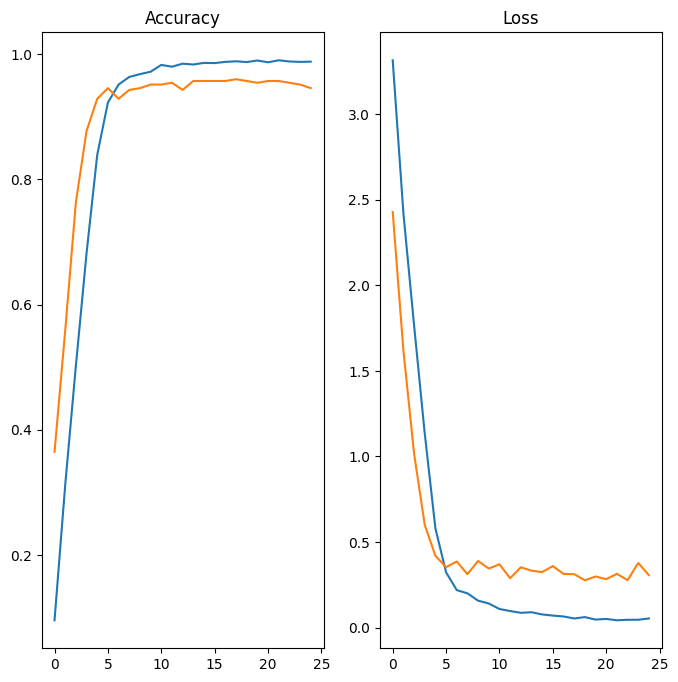

In [46]:
epoch_range = range(epochs_size)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epoch_range, history.history["accuracy"], label="Training Accuracy")
plt.plot(epoch_range, history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(epoch_range, history.history["loss"], label="Training Loss")
plt.plot(epoch_range, history.history["val_loss"], label="Validation Loss")
plt.title("Loss")


In [81]:
image = "paprika.jpg"
image = tf.keras.utils.load_img(image, target_size=(img_height,img_width))
img_arr = tf.keras.utils.array_to_img(image)
img_batch = tf.expand_dims(img_arr,0)

In [82]:
predict = model.predict(img_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [83]:
score = tf.nn.softmax(predict)

In [84]:
print(
    "vegetable/fruit in image is {} with accuracy of {:.2f}%".format(
        data_cat[np.argmax(score)], np.max(score) * 100
    )
)

vegetable/fruit in image is paprika with accuracy of 99.93%


In [ ]:
model.save("Image_Classification.keras")